<a href="https://colab.research.google.com/github/pyohamen/yonsei/blob/master/1-2_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EA%B3%BC%EC%A0%9C/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings

import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('seaborn')

# 보스턴 주택가격 데이터
파이썬 패키지에서 제공되는 데이터로 총 14개의 변수 (반응변수 포함)

In [ ]:
# 보스턴 주택가격 데이터 불러오기
from sklearn import datasets
bh = datasets.load_boston() #bh: Boston House

# 데이터셋 안에 무엇이 있는지 조사
print(bh.keys()) 
X = bh.data # 설명변수 저장
y = bh.target #반응변수 저장

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
# 데이터에 관한 설명
print(bh.DESCR)
# 가장 마지막 변수인 MEDV 가 반응변수임

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#설명변수들을 데이터프레임에 저장
boston = pd.DataFrame(bh.data, columns=bh.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston.info() #기본적인 데이터의 형태 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
boston['MEDV'] = bh.target # 반응변수를 더해서 데이터를 완성
boston.head() # 총 14개 변수 (반응변수 포함)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#단순선형회귀모형 적합 (설명변수 RM)
reg1 = ols('MEDV ~ LSTAT', data=boston).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        13:56:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

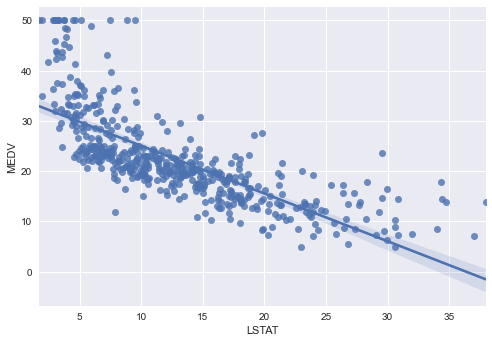

In [ ]:
sns.regplot('LSTAT', 'MEDV', data=boston,ci=95)
plt.show()

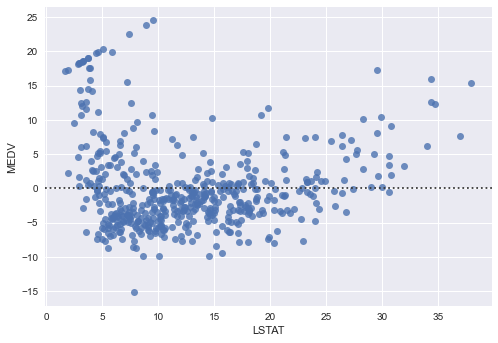

In [ ]:
#잔차 그림
sns.residplot('LSTAT', 'MEDV', data=boston)
plt.show()

<Figure size 1440x1440 with 0 Axes>

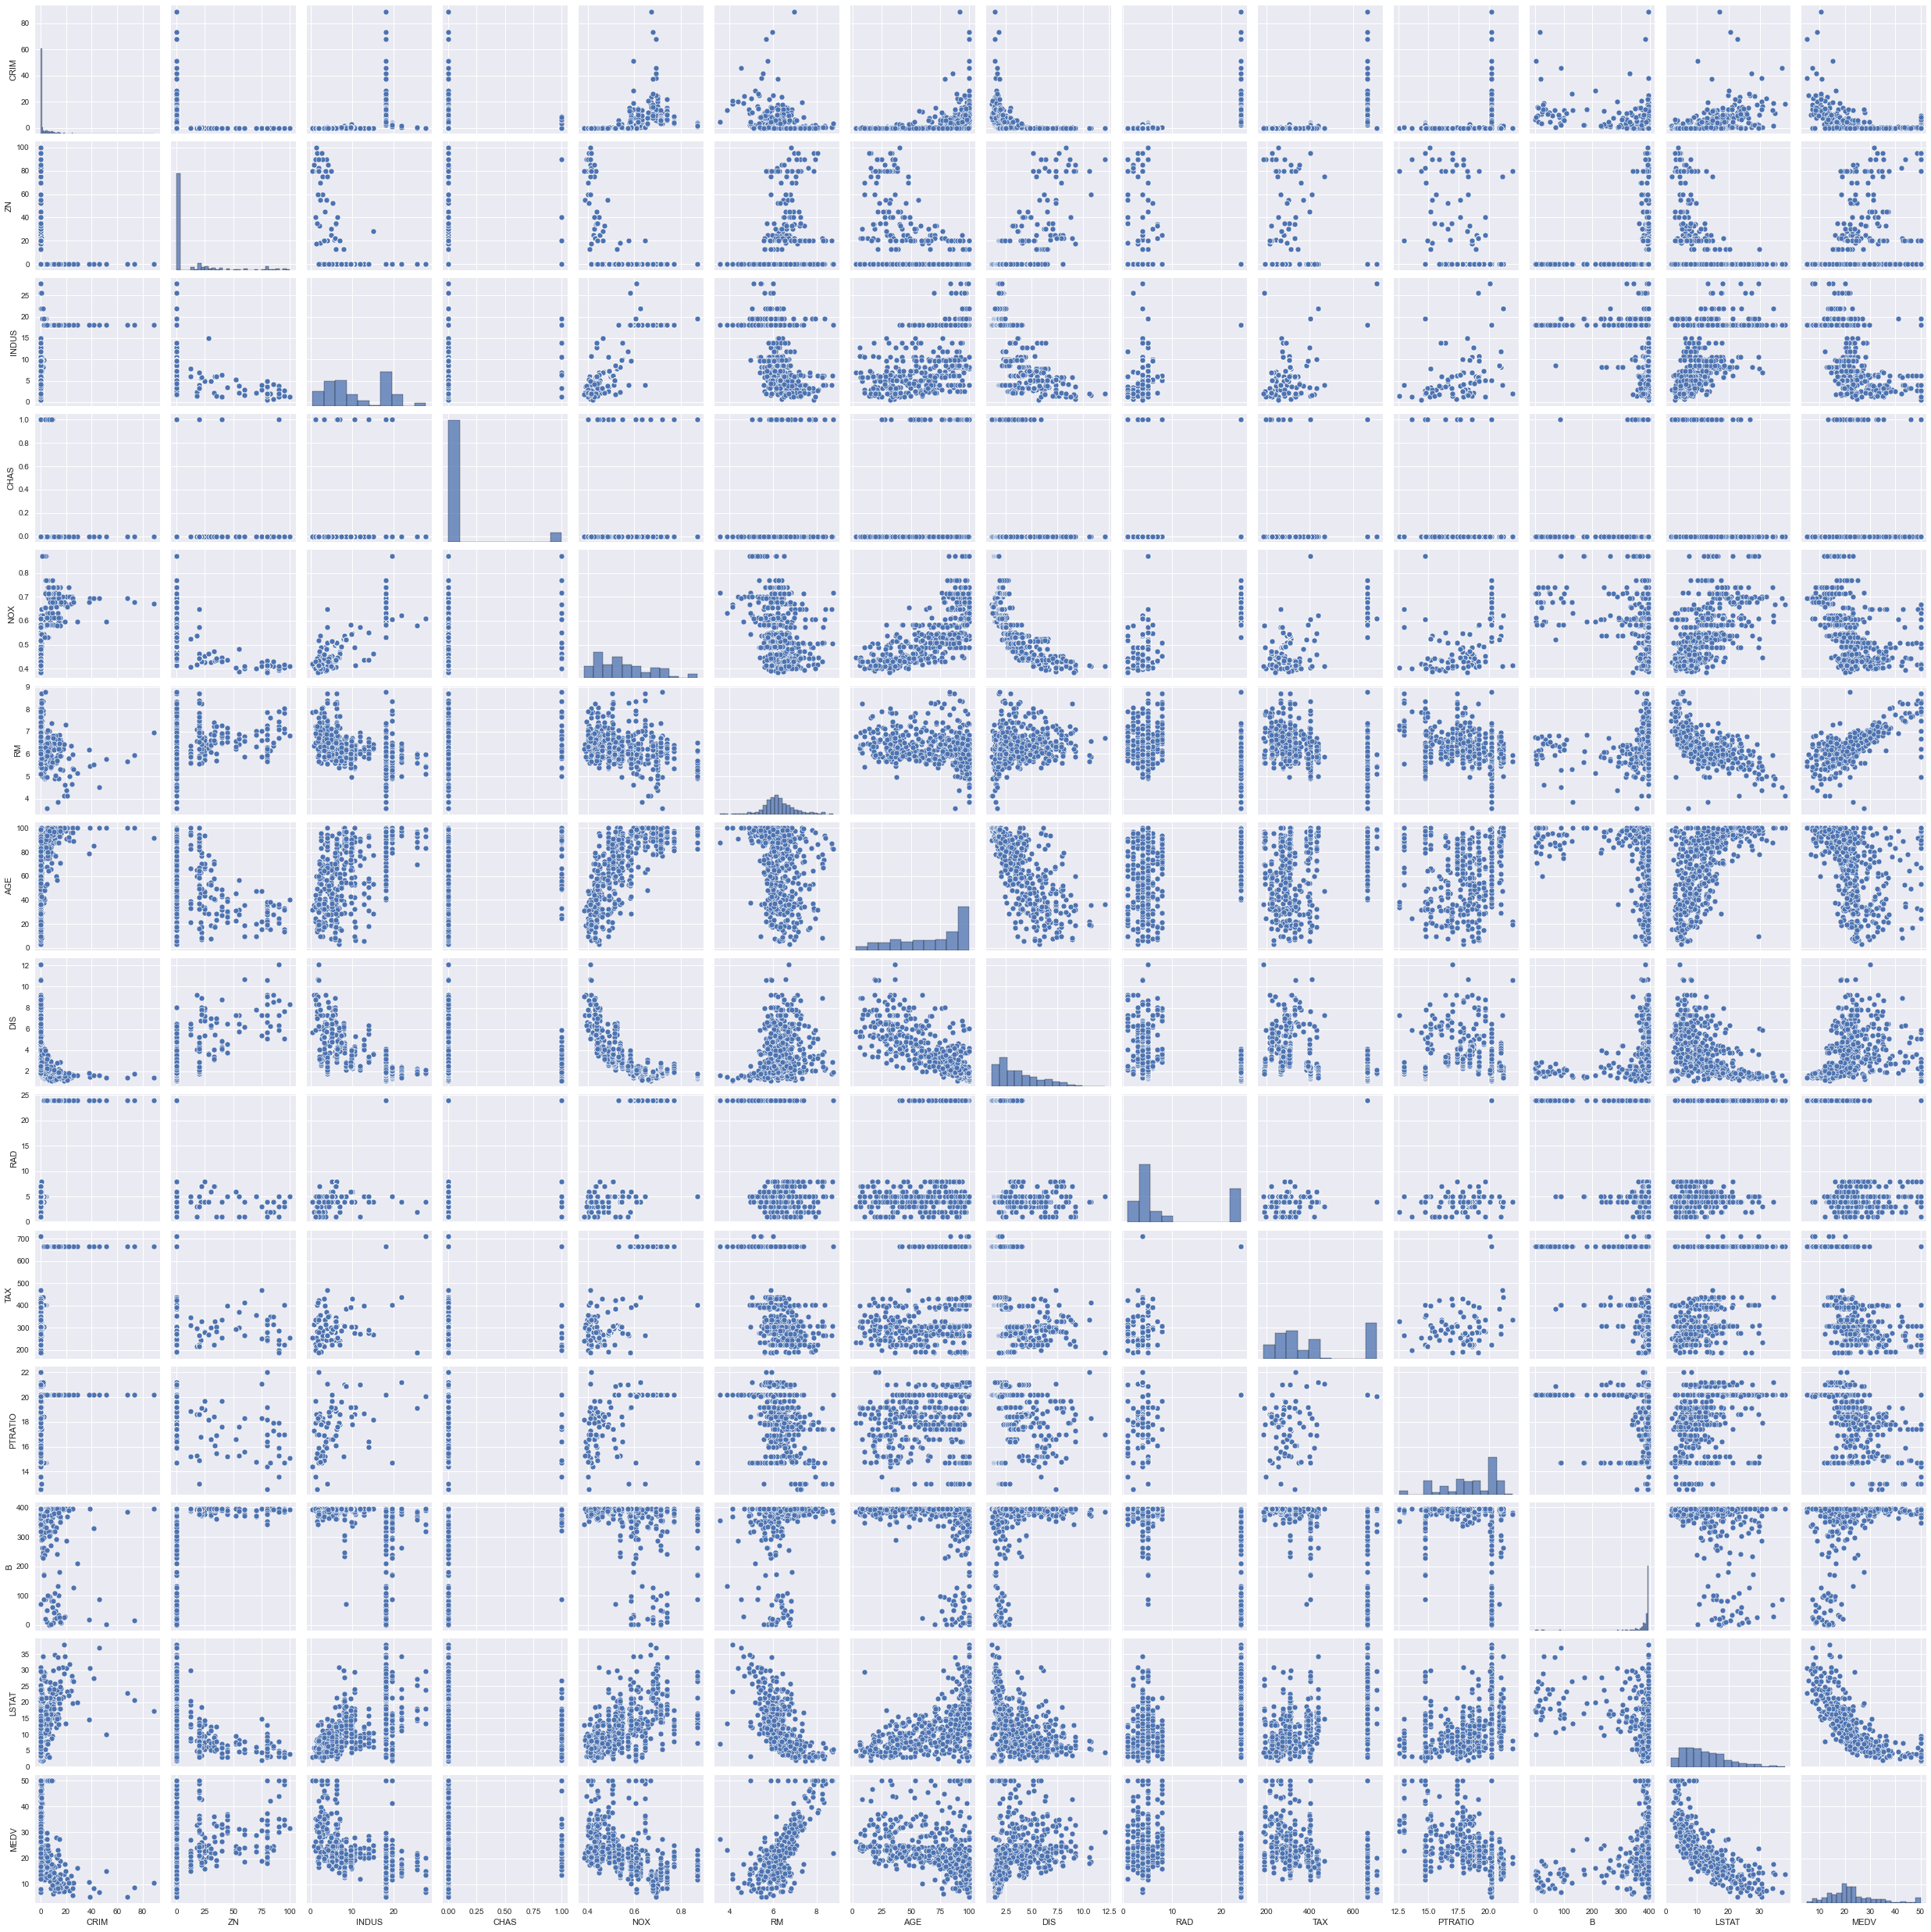

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(boston)
plt.show()

In [ ]:
# 회귀모형에서 사용할 설명변수들을 X 로 저장
X = boston.drop(['MEDV'], axis=1)

# 회귀모형에서 사용할 반응변수를 y 로 저장
y = boston.MEDV

# X에 포함된 모든 변수를 다 사용한 선형회귀모형의 공식 세팅
formula = 'MEDV ~ CRIM	+ ZN	+ INDUS	+CHAS	+NOX	+RM	+AGE	+DIS	+RAD	+TAX	+PTRATIO	+B	+LSTAT	'
reg2 = ols(formula, boston).fit() #모형 적합
print(results.summary()) #결과 출력

NameError: name 'results' is not defined

In [ ]:
sm.graphics.influence_plot(reg2) #잔차 그림
plt.show()

In [ ]:
def forward_selected_aic(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by aic
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = np.inf, np.inf
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().aic # (also can change bic)
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        print(pd.DataFrame(scores_with_candidates).T)
        best_new_score, best_candidate = scores_with_candidates.pop()
        print('---->',best_new_score, best_candidate, '\n')
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [ ]:

reg3 = forward_selected_aic(boston, 'MEDV' )

print(reg3.model.formula)
print(reg3.summary())


In [ ]:
#Lasso 를 이용해 회귀계수들이 0에 수렴하는 것을 그림으로 보여줌

alphas = np.linspace(0.1, 7, 200)
df = pd.DataFrame()


column = bh.feature_names
scaler = StandardScaler()
X = scaler.fit_transform(X) 


for cnt in alphas:
    temp_model = LassoCV(cv=5, random_state=0, alphas=[cnt], max_iter=1e5).fit(X,y)
    temp_coef = pd.Series(temp_model.coef_,index=column)
    df[temp_model.alpha_] = temp_coef

df = df.reset_index().melt(id_vars='index')

sns.lineplot(x="variable", y="value", hue="index",
             data=df)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.show()

In [ ]:

reg4 = LassoCV(cv=5, alphas=None, random_state=0, 
                max_iter=1e5, normalize=True).fit(X,y)

  # cv=5: K-겹교차검증에서 K 값
  # alphas = None:  후보 alphas (=lambda) 값의 집합을 자동으로 생성
  # random_state : 샘플링할때 seed
  # max_iter : 수치값들이 수렴할 수 있게 허용하는 최대 반복수 (크게 설정)
  # normalize=True : 자료를 표준화함.


In [ ]:
column =  bh.feature_names 
print('best lambda: %.2f\n' % reg4.alpha_)
print('회귀계수:\n',
      [name + ' : %.2f' % coef for name, coef in zip(column, reg4.coef_)])
print('\n회귀절편: %.2f\n' % reg4.intercept_)